<a href="https://colab.research.google.com/github/ThePituLegend/RISCV-MISE/blob/main/Combinacionals_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 3

Donada la funció booleana $f(a,b,c) = \overline{(a+\bar{b})\cdot\overline{(b+c)}+a\cdot b\cdot c}$:
* Simplifica la funció utilitzant les propietats de l’àlgebra de Boole (a paper)
* Dibuixa el circuit lògic que la implementa

In [1]:
# @title Carregar Py4Hw { display-mode: "form" }
# @markdown Des de GitHub

!pip install nbwavedrom                             &> /dev/null
!git clone https://github.com/ThePituLegend/py4hw   &> /dev/null
%cd /content/py4hw
from py4hw import *

if "py4hw" in dir():
  print("OK")
else:
  print("ERROR")

/content/py4hw
OK


In [4]:
# @title Blocs adicionals { display-mode: "form" }
# @markdown (*Or3*)

class Or3(Logic):
    """
    Binary And
    """

    def __init__(self, parent, name: str, a: Wire, b: Wire, c: Wire,
                 r: Wire):
        super().__init__(parent, name)
        self.a = self.addIn("a", a)
        self.b = self.addIn("b", b)
        self.c = self.addIn("c", c)
        self.r = self.addOut("r", r)

    def propagate(self):
        self.r.put(self.a.get() | self.b.get() | self.c.get())

## Disseny del circuit

Completa la següent classe amb la teva proposta de circuit.

**NOTA:** Disposes d'una porta lògica Or3, amb 3 entrades.

In [12]:
class Circuit(Logic):
  def __init__(self, parent: Logic, name: str, a: Wire, b: Wire, c: Wire, f: Wire):
    super().__init__(parent, name)
    self.addIn("a", a)
    self.addIn("b", b)
    self.addIn("c", c)
    self.addOut("f(a,b,c)", f)

    # TODO: Instancia els cables intermitjos que necessitis
    notA = self.wire("~a")                          # Alumne
    notB = self.wire("~b")                          # Alumne
    notC = self.wire("~c")                          # Alumne

    bOrC = self.wire("b+c")                         # Alumne
    nAnBnC = self.wire("~a+~b+~c")                  # Alumne

    # TODO: Instancia els blocs funcionals que necesitis
    Not(self, "~a", a, notA)                        # Alumne
    Not(self, "~b", b, notB)                        # Alumne
    Not(self, "~c", c, notC)                        # Alumne

    Or(self, "b+c", b, c, bOrC)                     # Alumne (Correcte)
    #Or(self, "b+c", b, a, bOrC)                     # Alumne (Incorrecte)
    Or3(self, "~a+~b+~c", notA, notB, notC, nAnBnC) # Alumne

    And(self, "(b+c)·(~a+~b+~c)", bOrC, nAnBnC, f)  # Alumne

iter 3 cost: 0 False


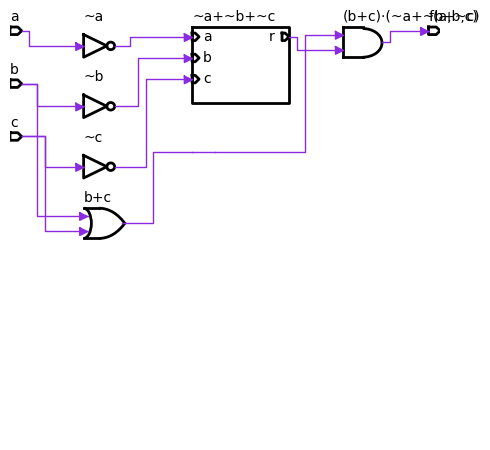

In [13]:
# @title Esquemàtic del circuit implementat { display-mode: "form" }

schm = HWSystem()

a = schm.wire("a", 1)
b = schm.wire("b", 1)
c = schm.wire("c", 1)
f = schm.wire("f", 1)

circuit = Circuit(schm, "Circuit", a, b, c, f)

Schematic(circuit)

In [14]:
# @title És correcte el meu circuit? { display-mode: "form" }
# @markdown El teu circuit passarà una prova automatitzada per a comprovar la seva validesa.

from IPython.display import Markdown, display
pprint = lambda x: display(Markdown(x))

test = HWSystem()

a = test.wire("a", 1)
b = test.wire("b", 1)
c = test.wire("c", 1)
f = test.wire("f", 2)

circuit = Circuit(test, "Circuit", a, b, c, f)

sol = [0, 1, 1, 1, 0, 1, 1, 0]

sol_w = test.wire("Solución", 2)
Sequence(test, "Solución", sol, sol_w)

Sequence(test, "a", [0]*4 + [1]*4, a)
Sequence(test, "b", [0, 0, 1, 1, 0, 0, 1, 1], b)
Sequence(test, "c", [i%2 for i in range(8)], c)

wf = Waveform(test, "TEST", [a, b, c, f, sol_w])

sim = test.getSimulator()

err = 0

for i, val in enumerate(sol):
  sim.clk(1)
  
  if f.get() != val:
    err += 1
    pprint(f"- **CLK {i+1}**: ¡Se esperaba **{val}** y se ha obtenido **{f.get()}**!")
    wf.waves[f]["wave"] =  wf.waves[f]["wave"][:-1] + "4"
  
if err == 0:
  pprint("**¡Circuito correcto!**")
else:
  pprint(f"**{err}** errores encontrados.")

draw_waveform(wf.get_waveform())    

**¡Circuito correcto!**